In [15]:
import getdist
import numpy as np
import pylab as mplot
import os
from getdist import plots, MCSamples

import h5py  
import pandas as pd

%pylab inline

font = {'size'   : 18}
mplot.rc('font', **font)
mplot.rc('text', usetex=False)
mplot.rc('font', family='serif')


#239, 96, 96
#255, 194, 0
#121, 183, 179
def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb

c_2=rgb_to_hex((239, 96, 96))
c_3=rgb_to_hex((255, 194, 0)) 
c_23=rgb_to_hex((121, 183, 179)) 
c_cs="black"#rgb_to_hex((161, 13, 79)) 

def get_nsample(filename):
    with open(filename,"r") as fi:
        for ln in fi:
            if ln.startswith("#nsample="):
                nsamples = int(ln[9:])
    return nsamples

def load_file(filename):
    chain = pd.read_hdf(filename).values
    return chain




Populating the interactive namespace from numpy and matplotlib


In [5]:
import cPickle as pickle

def save_obj(name, obj):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
        f.close()
        
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        mute =  pickle.load(f)
        f.close()
    return mute

In [96]:
save_nz = load_obj('save_nz')

In [ ]:
# normy = np.sum((nz_rebin*sfx)[mask_sigma])
# normwz = np.sum(theory_Nz[mask_sigma,0])
# y =(nz_rebin*sfx)/normy-theory_Nz[:,0]/normwz
# meow['nz_th'] = (nz_rebin*sfx)/normy
# meow['nz_wz'] = theory_Nz[:,0]/normwz
# meow['err_wz'] = err_rm[mask_sigma]/normwz
# meow['sfx'] = sfx

In [83]:
def rebin(z_old, pdf_old, zbins):
        # spline
        kwargs_spline = {'s': 0,  # force spline to go through data points
                         'ext': 'zeros',  # ext=0 means extrapolate, =1 means return 0
                         'k': 3,
                        }
        spline = UnivariateSpline(z_old, pdf_old, **kwargs_spline)
        pdf = np.zeros(len(zbins) - 1)
        for i in range(len(zbins) - 1):
            zmin = zbins[i]
            zmax = zbins[i + 1]
            pdf[i] = spline.integral(zmin, zmax) #/ (zmax - zmin)
        return pdf

In [102]:
save_nz[t]['bin_edges']

array([0.15 , 0.182, 0.214, 0.246, 0.278, 0.31 , 0.342, 0.374, 0.406,
       0.438, 0.47 , 0.502, 0.534, 0.566, 0.598, 0.63 , 0.662, 0.694,
       0.726, 0.758, 0.79 , 0.822, 0.854, 0.886, 0.918])

In [117]:
from scipy.interpolate import UnivariateSpline
true_nz = dict()
z_cosmosis = run_cosmosis[4].data['Z_MID']

for t in range(3):
    print len(save_nz[t]['bin_edges'])
    mt= rebin(z_cosmosis, run_cosmosis[4].data['BIN{0}'.format(t+1)], save_nz[t]['bin_edges'])
    mask_sigma = (save_nz[t]['zbins'] > (compute_mean(save_nz[t]['zbins'],mt) -2.*compute_std(save_nz[t]['zbins'],mt))) & (save_nz[t]['zbins'] < (compute_mean(save_nz[t]['zbins'],mt) + 2.*compute_std(save_nz[t]['zbins'],mt)))
    norm = np.sum(mt[mask_sigma])
    true_nz[t] = mt/norm

25
25
25


In [115]:
def compute_mean(z0,nz0):
    norm0 = 0.
    mean0 = 0.
    for kk in range(len(z0)):
        norm0+=nz0[kk]
        mean0+=nz0[kk]*z0[kk]
    return mean0/norm0
 
    
def compute_std(z0,nz0):
    norm0 = 0.
    mean0 = 0.
    std = 0.
    for kk in range(len(z0)):
        norm0+=nz0[kk]
        mean0+=nz0[kk]*z0[kk]
    mean0 = mean0/norm0
    norm0 = 0.
    for kk in range(len(z0)):
        norm0+=nz0[kk]
        std+=nz0[kk]*(z0[kk]-mean0)**2
    if std>0.and norm0>0.:
        return  np.sqrt(std/norm0)
    else:
    
        return 0.

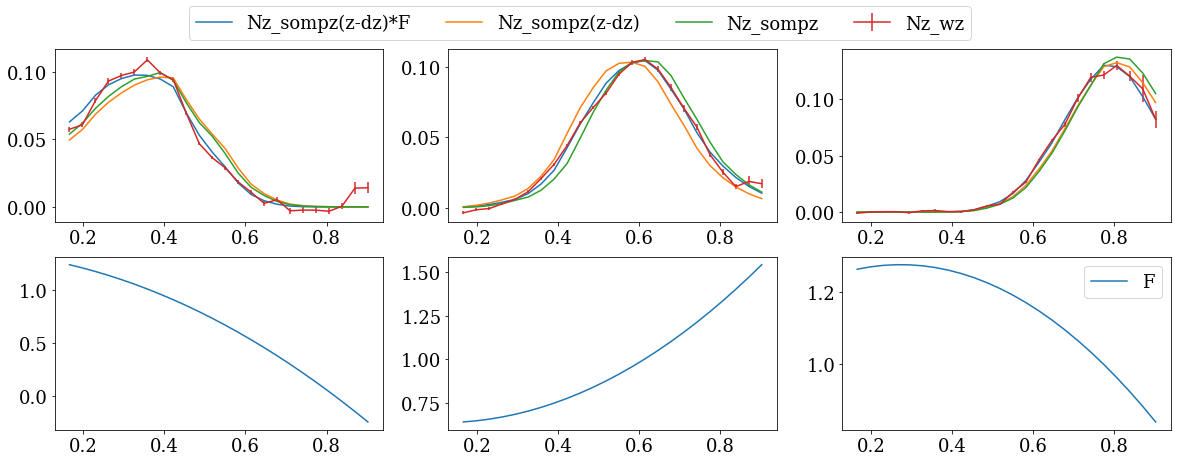

In [140]:
fig, ax = plt.subplots(2,3, figsize= (20.,7.))
for t in range(3):
    ax[0,t].plot(save_nz[t]['zbins'], save_nz[t]['nz_th_F'], label = 'Nz_sompz(z-dz)*F')
    ax[0,t].plot(save_nz[t]['zbins'], save_nz[t]['nz_th'], label = 'Nz_sompz(z-dz)')
    ax[0,t].plot(save_nz[t]['zbins'], true_nz[t], label = 'Nz_sompz')
    ax[0,t].errorbar(save_nz[t]['zbins'], save_nz[t]['nz_wz'], save_nz[t]['err_wz'], label = 'Nz_wz')
    
    ax[1,t].plot(save_nz[t]['zbins'], save_nz[t]['sfx'], label = 'F')
ax[0,2].legend(loc='upper center', bbox_to_anchor=(-0.8, 1.3), ncol=4)
ax[1,2].legend()
plt.savefig('./figures/nz_.pdf')
#plt.tight_layout()

In [77]:
import astropy.io.fits as pf
run_cosmosis = pf.open('/global/homes/m/mgatti/clustering-z/cosmosis/run_cosmosis_4_5.fits')

In [80]:
run_cosmosis[4].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   56 / length of dimension 1                          
NAXIS2  =                  400 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    7 / number of table fields                         
NZDATA  =                    T                                                  
EXTNAME = 'nz_source'                                                           
TTYPE1  = 'Z_LOW   '                                                            
TFORM1  = 'D       '                                                            
TTYPE2  = 'Z_MID   '        

In [74]:
wz_cosmosis1.keys()

['syst_mean_rm',
 'th_correction',
 'syst_mean_eboss',
 'mag_pos',
 'Nz_eboss',
 'bincenters_eboss',
 'shape_mode',
 'bincenters_rm',
 'mag_pos1',
 'alpha_mag_rm',
 'Nz_rm',
 'cross_cov',
 'bias_eboss',
 'th_correction_eboss',
 'syst_std_rm',
 'bias_rm']

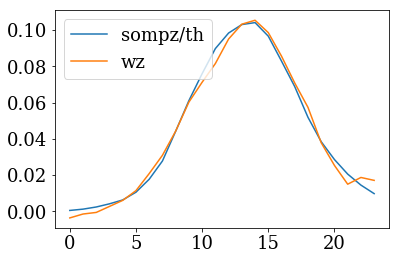

In [40]:
# plt.plot(save_nz[1]['nz_th'], label = 'sompz/th')
plt.plot(save_nz[1]['nz_wz'], label = 'wz')
plt.legend()

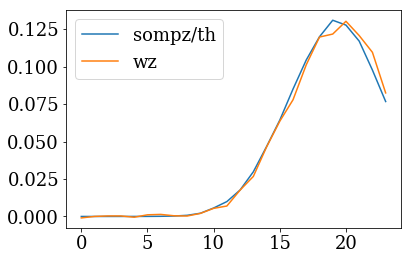

In [41]:
plt.plot(save_nz[2]['nz_th'], label = 'sompz/th')
plt.plot(save_nz[2]['nz_wz'], label = 'wz')
plt.legend()

In [141]:
path = "./chains/"




chains_options = ['mag_rm_eboss_std', 'mag_rm_eboss', 'nomag_eboss', 'nomag_rm_eboss', 'nomag_rm']
#chains_options = ['nomag_rm', 'nomag_rm_eboss','nomag_eboss','mag_rm_eboss_std' ]
#chains_options = ['nomag_rm', 'nomag_eboss','nomag_rm_eboss','prior' ]

#chains_options = ['nomag_rm_eboss','mag_rm_eboss','mag_rm_eboss_std','prior' ]
#chains_options = ['mag_rm_eboss_std_05','prior_05' ]
chains_options = ['shape']
wz_names = ['shape']

path_ratio = '/global/cscratch1/sd/mgatti/Cosmic_shear/y3-3x2pt-methods/cosmosis/'
chains_options_ratio = ['ratio_like/chain_ratio_like_sim_shear_ratio_buzzard_1_ed.fits_scales_3x2pt_Y1.ini_lcdm',
                       'wz_like/chain_wz_like_sim_shear_ratio_buzzard_1_ed.fits_scales_3x2pt_Y1.ini_lcdm']
                       #'ratio_wz_like/chain_ratio_wz_like_sim_shear_ratio_buzzard_1_ed.fits_scales_3x2pt_Y1.ini_lcdm',
                       #]
chains_options_ratio = ['wz_like/chain_wz_like_sim_shear_ratio_buzzard_1_ed.fits_scales_3x2pt_Y1.ini_lcdm',
                       'ratio_like/chain_ratio_like_sim_shear_ratio_buzzard_1_ed.fits_scales_3x2pt_Y1.ini_lcdm']
chains_options_ratio =[]                    
ratio_names = ['wz','shear_ratio']#,'wz+shear_ratio']

data = dict()
labels = []
count = 0

for i,n in enumerate(chains_options) :
    labels.append(wz_names[i])
    cosmic_shear =  path +'chain_output_{0}.txt'.format(n)
    f = open(cosmic_shear)
    cosmic_shear = []
    for c,ff in enumerate(f):

            if ff[0]=='#':
                pass

            else:

                f1 = (ff.replace('\t',' ').replace('\n',''))
                f1=np.array(list(map(float, f1.split())))

                cosmic_shear.append(f1)

    data[wz_names[i]] = np.array(cosmic_shear)
    f.close()
    count+=1
    
    

for i,n in enumerate(chains_options_ratio) :
    labels.append(ratio_names[i])
    cosmic_shear =  path_ratio  +'{0}.txt'.format(n)
    f = open(cosmic_shear)
    cosmic_shear = []
    for c,ff in enumerate(f):

            if ff[0]=='#':
                pass

            else:

                f1 = (ff.replace('\t',' ').replace('\n',''))
                f1=np.array(list(map(float, f1.split())))

                cosmic_shear.append(f1)

    data[ratio_names[i]] = np.array(cosmic_shear)
    f.close()
    count+=1
    print 'done'
    
    


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
loaded


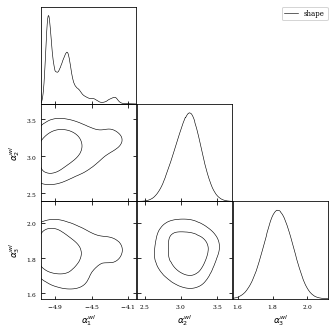

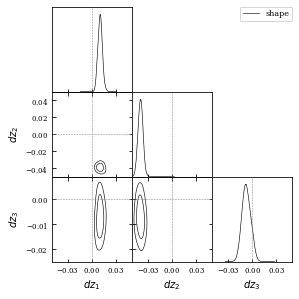

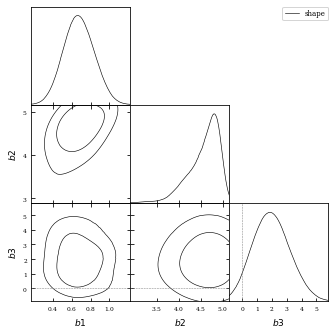

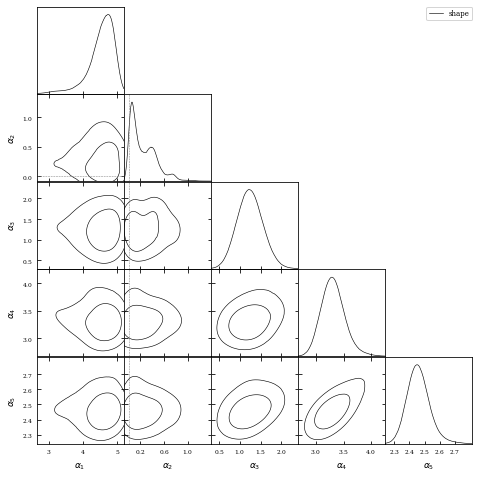

"\nix =1\np = Samples[ix].getParams()\ns = Samples[ix].twoTailLimits(p.dz1, 0.68)[1]-Samples[ix].twoTailLimits(p.dz1, 0.68)[0]\nm = Samples[ix].mean(p.dz1)\nprint '{0:2.4f} \\pm {1:2.4f}'.format(m,s/2.)\n\np = Samples[ix].getParams()\ns = Samples[ix].twoTailLimits(p.dz2, 0.68)[1]-Samples[ix].twoTailLimits(p.dz2, 0.68)[0]\nm = Samples[ix].mean(p.dz2)\nprint '{0:2.4f} \\pm {1:2.4f}'.format(m,s/2.)\n\n\np = Samples[ix].getParams()\ns = Samples[ix].twoTailLimits(p.dz3, 0.68)[1]-Samples[ix].twoTailLimits(p.dz3, 0.68)[0]\nm = Samples[ix].mean(p.dz3)\nprint '{0:2.4f} \\pm {1:2.4f}'.format(m,s/2.)\n\n"

In [142]:
Samples=[]
Samples_mag=[]
Samples_mag_WL=[]
Samples_bias_WL=[]
labels_Samples=[]
labels_Samples_mag=[]
labels_Samples_mag_WL=[]
labels_Samples_bias_WL=[]

bn = 0


for i,n in enumerate(labels) :
    dz1 = np.array(data[n][bn:,4])
    dz2 = np.array(data[n][bn:,5])
    dz3 = np.array(data[n][bn:,6])
    dz4 = np.array(data[n][bn:,7])
    w = np.array(data[n][bn:,-1])
    #w = np.ones(len(data[n][bn:,-1]))
    samples = MCSamples(samples=np.c_[dz1,dz2,dz3], weights=(w),
                names = ['dz1','dz2','dz3'], 
                labels = [r'dz_1',r'dz_2',r'dz_3'])

    Samples.append(samples)
    labels_Samples.append(n)
    try:
        # bias wl ********************************************************
        b1 = np.array(data[n][bn:,24])
        b2 = np.array(data[n][bn:,25])
        b3 = np.array(data[n][bn:,26])
        samples = MCSamples(samples=np.c_[b1,b2,b3], weights=(w),
                    names = ['b1','b2','b3'], 
                    labels = [r'b1',r'b2',r'b3'])
        Samples_bias_WL.append(samples)
        labels_Samples_bias_WL.append(n)
        # wl mag ********************************************************
        alphawl1 = np.array(data[n][bn:,28])
        alphawl2 = np.array(data[n][bn:,29])
        alphawl3 = np.array(data[n][bn:,30])
        samples = MCSamples(samples=np.c_[alphawl1,alphawl2,alphawl3], weights=(w),
                    names = ['alpha1','alpha2','alpha3'], 
                    labels = [r'\alpha^{wl}_1',r'\alpha^{wl}_2',r'\alpha^{wl}_3'])
        Samples_mag_WL.append(samples)
        labels_Samples_mag_WL.append(n)
    except:
        pass
    # lens mag
    alpha1 = np.array(data[n][bn:,14])
    alpha2 = np.array(data[n][bn:,15])
    alpha3 = np.array(data[n][bn:,16])
    alpha4 = np.array(data[n][bn:,17])
    alpha5 = np.array(data[n][bn:,18])
    samples = MCSamples(samples=np.c_[alpha1,alpha2,alpha3,alpha4,alpha5], weights=(w),
                names = ['alpha1','alpha2','alpha3','alpha4','alpha5'], 
                labels = [r'\alpha_1',r'\alpha_2',r'\alpha_3',r'\alpha_4',r'\alpha_5'])

    Samples_mag.append(samples)
    labels_Samples_mag.append(n)



    
print ("loaded")
try:
    g = plots.getSubplotPlotter(width_inch=5)
    g.triangle_plot(Samples_mag_WL,  ['alpha1','alpha2','alpha3'],  
    #g.triangle_plot([Samples_mag_WL[0],Samples_mag_WL[1]], ['alpha1','alpha2','alpha3'],  
              filled=[False,True,True,True], colors=[c_cs,c_2,c_3,c_23], alphas=[1,0.4,0.8,1.], lw=[3,3,3],
              legend_labels=labels_Samples_mag_WL, 
              #legend_labels=['mean rm nomag', 'mean rm + spread rm', 'mean eboss nomag','combined'], 
              legend_loc='upper right', 
              #line_args=[ {'lw':2, 'color':c_23},{'lw':0.6, 'color':c_cs}], 
              line_args=[{'lw':0.6, 'color':c_cs},{'lw':2, 'color':c_2}, {'lw':2, 'color':c_3},  {'lw':2, 'color':c_23}], 
              contour_colors=['null',c_2,c_3,c_23], markers=[0.,0.,0.,0.,])
    plt.tight_layout()
    plt.show()
except:
    pass

g = plots.getSubplotPlotter(width_inch=4.5)
g.triangle_plot(Samples, ['dz1','dz2','dz3'],  
          filled=[False,True,True,True], colors=[c_cs,c_2,c_3,c_23], alphas=[1,0.4,0.8,1.], lw=[3,3,3],
              legend_labels=labels_Samples, 
          #legend_labels=['mean rm nomag', 'mean rm + spread rm', 'mean eboss nomag','combined'], 
          legend_loc='upper right', 
          line_args=[{'lw':0.6, 'color':c_cs},{'lw':2, 'color':c_2}, {'lw':2, 'color':c_3},  {'lw':2, 'color':c_23}], 
              contour_colors=['null',c_2,c_3,c_23], markers=[0.,0.,0.,0.,],
          param_limits={'dz1': [-0.05,0.05], 
                        'dz2': [-0.05,0.05],
                        'dz3': [-0.05,0.05]}
                        
                       )
plt.tight_layout()
plt.savefig('./figures/dz.pdf')
plt.show()

try:
    g = plots.getSubplotPlotter(width_inch=5)
    g.triangle_plot(Samples_bias_WL,  ['b1','b2','b3'],  
              filled=[False,True,True,True], colors=[c_cs,c_2,c_3,c_23], alphas=[1,0.4,0.8,1.], lw=[3,3,3],
              legend_labels=labels_Samples_bias_WL, 
              #legend_labels=['mean rm nomag', 'mean rm + spread rm', 'mean eboss nomag','combined'], 
              legend_loc='upper right', 
              line_args=[{'lw':0.6, 'color':c_cs},{'lw':2, 'color':c_2}, {'lw':2, 'color':c_3},  {'lw':2, 'color':c_23}], 
              contour_colors=['null',c_2,c_3,c_23], markers=[0.,0.,0.,0.,])


                           
    plt.tight_layout()
    plt.show()
except:
    pass



g = plots.getSubplotPlotter(width_inch=7)
g.triangle_plot(Samples_mag,  ['alpha1','alpha2','alpha3','alpha4','alpha5'],  
          filled=[False,True,True,True], colors=[c_cs,c_2,c_3,c_23], alphas=[1,0.4,0.8,1.], lw=[3,3,3],
              legend_labels=labels_Samples_mag, 
          #legend_labels=['mean rm nomag', 'mean rm + spread rm', 'mean eboss nomag','combined'], 
          legend_loc='upper right', 
          line_args=[{'lw':0.6, 'color':c_cs},{'lw':2, 'color':c_2}, {'lw':2, 'color':c_3},  {'lw':2, 'color':c_23}], 
              contour_colors=['null',c_2,c_3,c_23], markers=[0.,0.,0.,0.,], 
    
                        
                       )
plt.tight_layout()
plt.show()

'''
ix =1
p = Samples[ix].getParams()
s = Samples[ix].twoTailLimits(p.dz1, 0.68)[1]-Samples[ix].twoTailLimits(p.dz1, 0.68)[0]
m = Samples[ix].mean(p.dz1)
print '{0:2.4f} \pm {1:2.4f}'.format(m,s/2.)

p = Samples[ix].getParams()
s = Samples[ix].twoTailLimits(p.dz2, 0.68)[1]-Samples[ix].twoTailLimits(p.dz2, 0.68)[0]
m = Samples[ix].mean(p.dz2)
print '{0:2.4f} \pm {1:2.4f}'.format(m,s/2.)


p = Samples[ix].getParams()
s = Samples[ix].twoTailLimits(p.dz3, 0.68)[1]-Samples[ix].twoTailLimits(p.dz3, 0.68)[0]
m = Samples[ix].mean(p.dz3)
print '{0:2.4f} \pm {1:2.4f}'.format(m,s/2.)

'''


In [16]:
# path = "/global/homes/g/giannini/clustering-z/CORE/WZ_like/"
# #chains_options = ['mag_rm_eboss_std', 'mag_rm_eboss', 'nomag_eboss', 'nomag_rm_eboss', 'nomag_rm']
# #chains_options = ['nomag_rm', 'nomag_rm_eboss','nomag_eboss','mag_rm_eboss_std' ]
# #chains_options = ['nomag_rm', 'nomag_eboss','nomag_rm_eboss','prior' ]

# #chains_options = ['nomag_rm_eboss','mag_rm_eboss','mag_rm_eboss_std','prior' ]
# #chains_options = ['mag_rm_eboss_std_05','prior_05' ]
# chains_options = ['shape']# , 'mag_rm_eboss_std_noprior' ]
# #chains_options = ['nomag_rm_noprior', 'nomag_rm_eboss_noprior', 'mag_rm_eboss_std_noprior','prior_noprior' ]


# data = dict()
# for i,n in enumerate(chains_options) :
#     cosmic_shear =  path +'chain_output_{0}.txt'.format(n)
#     f = open(cosmic_shear)
#     cosmic_shear = []
#     for c,ff in enumerate(f):

#             if ff[0]=='#':
#                 pass

#             else:

#                 f1 = (ff.replace('\t',' ').replace('\n',''))
#                 f1=np.array(list(map(float, f1.split())))

#                 cosmic_shear.append(f1)

#     data[n] = np.array(cosmic_shear)
#     f.close()
# print (np.shape(data))

()


In [19]:
# Samples=[]
# Samples_mag=[]
# Samples_mag_WL=[]
# Samples_bias_WL=[]
# Samples_lens=[]
# Samples_bias_l=[]
# Samples_wz_nuisance=[]

# bn = 0
# for i,n in enumerate(chains_options) :
#     dz1 = np.array(data[n][bn:,4])
#     dz2 = np.array(data[n][bn:,5])
#     dz3 = np.array(data[n][bn:,6])
#     dz4 = np.array(data[n][bn:,7])
#     w = np.array(data[n][bn:,-1])

#     dzl1 = np.array(data[n][bn:,8])
#     dzl2 = np.array(data[n][bn:,9])
#     dzl3 = np.array(data[n][bn:,10])
    
#     # bias lens
#     b1l = np.array(data[n][bn:,11])
#     b2l = np.array(data[n][bn:,12])
#     b3l = np.array(data[n][bn:,13])
    
#     # bias wl
#     b1 = np.array(data[n][bn:,24])
#     b2 = np.array(data[n][bn:,25])
#     b3 = np.array(data[n][bn:,26])
#     b4 = np.array(data[n][bn:,27])
    
#     # wl mag
#     alphawl1 = np.array(data[n][bn:,28])
#     alphawl2 = np.array(data[n][bn:,29])
#     alphawl3 = np.array(data[n][bn:,30])
#     alphawl4 = np.array(data[n][bn:,31])

#     # lens mag
#     alpha1 = np.array(data[n][bn:,14])
#     alpha2 = np.array(data[n][bn:,15])
#     alpha3 = np.array(data[n][bn:,16])
#     alpha4 = np.array(data[n][bn:,17])
#     alpha5 = np.array(data[n][bn:,18])
   
#     # nuisance parameters (F)
#     c1_1 = np.array(data[n][bn:,32])
#     c1_2 = np.array(data[n][bn:,33])
#     c2_1 = np.array(data[n][bn:,34])
#     c2_2 = np.array(data[n][bn:,35])
#     c3_1 = np.array(data[n][bn:,36])
#     c3_2 = np.array(data[n][bn:,37])

    
#     samples = MCSamples(samples=np.c_[dz1,dz2,dz3,dz4], weights=(w),
#                 names = ['dz1','dz2','dz3', 'dz4'], 
#                 labels = [r'dz_1',r'dz_2',r'dz_3', 'dz_4'])
#     Samples.append(samples)
    
#     samples = MCSamples(samples=np.c_[alpha1,alpha2,alpha3,alpha4,alpha5], weights=(w),
#                 names = ['alpha1','alpha2','alpha3','alpha4','alpha5'], 
#                 labels = [r'\alpha 1',r'\alpha 2',r'\alpha 3',r'\alpha 4',r'\alpha5'])
#     Samples_mag.append(samples)
    
#     samples = MCSamples(samples=np.c_[b1,b2,b3,b4], weights=(w),
#                 names = ['b1','b2','b3','b4'], 
#                 labels = [r'b1',r'b2',r'b3','b4'])
#     Samples_bias_WL.append(samples)
    
#     samples = MCSamples(samples=np.c_[alphawl1,alphawl2,alphawl3, alphawl4], weights=(w),
#                 names = ['alpha1','alpha2','alpha3', 'alpha4'], 
#                 labels = [r'\alpha wl 1',r'\alpha wl 2',r'\alpha wl 3', r'\alpha wl 4'])
#     Samples_mag_WL.append(samples)

#     samples = MCSamples(samples=np.c_[dzl1,dzl2,dzl3], weights=(w),
#                 names = ['dzl1','dzl2','dzl3'], 
#                 labels = [r'dz_1',r'dz_2',r'dz_3'])
#     Samples_lens.append(samples)
        
#     samples = MCSamples(samples=np.c_[b1l,b2l,b3l], weights=(w),
#                 names = ['b1l','b2l','b3l'], 
#                 labels = [r'bl_1',r'bl_2',r'bl_3'])
#     Samples_bias_l.append(samples)
    
#     samples = MCSamples(samples=np.c_[c1_1, c1_2, c2_1, c2_2, c3_1, c3_2], weights=(w),
#                 names = ['c1_1', 'c1_2', 'c2_1', 'c2_2', 'c3_1', 'c3_2'], 
#                 labels = ['c1_1', 'c1_2', 'c2_1', 'c2_2', 'c3_1', 'c3_2'])
#     Samples_wz_nuisance.append(samples)
    
    
# print ("loaded")
# g = plots.getSubplotPlotter(width_inch=5)
# #g.triangle_plot([Samples_mag_WL[0],Samples_mag_WL[1],Samples_mag_WL[2],Samples_mag_WL[3]],  ['alpha1','alpha2','alpha3'],  
# g.triangle_plot([Samples_mag_WL[0],Samples_mag_WL[1]], ['alpha1','alpha2','alpha3'],  
#           filled=[True,True,True,False], colors=[c_2,c_3,c_23,c_cs], alphas=[1,0.4,0.8,1.], lw=[3,3,3],
#           legend_labels=chains_options, 
#           #legend_labels=['mean rm nomag', 'mean rm + spread rm', 'mean eboss nomag','combined'], 
#           legend_loc='upper right', 
#           #line_args=[ {'lw':2, 'color':c_23},{'lw':0.6, 'color':c_cs}], 
#           line_args=[{'lw':2, 'color':c_2}, {'lw':2, 'color':c_3},  {'lw':2, 'color':c_23},{'lw':0.6, 'color':c_cs}], 
#           contour_colors=[c_2,c_3,c_23,'null'], markers=[0.,0.,0.,0.,], 
    
                        
#                        )
# plt.savefig('alpha.pdf')
# plt.show()


# g = plots.getSubplotPlotter(width_inch=7)
# g.triangle_plot([Samples[0],Samples[1]], ['dz1','dz2','dz3'],  
# #g.triangle_plot([Samples[0],Samples[1], Samples[2], Samples[3]], ['dz1','dz2','dz3'],  
#           filled=[True,True,True,False], colors=[c_2,c_23,c_23,c_cs], alphas=[1,0.8,0.8,1.], lw=[3,3,3],
#           legend_labels=chains_options, 
#           #legend_labels=['mean rm nomag', 'mean rm + spread rm', 'mean eboss nomag','combined'], 
#           legend_loc='upper right', 
#           line_args=[{'lw':2, 'color':c_2}, {'lw':2, 'color':c_3},  {'lw':2, 'color':c_23},{'lw':0.6, 'color':c_cs}], 
#           contour_colors=[c_2,c_3,c_23,'null'], markers=[0.,0.,0.,0.,], 
#           param_limits={'dz1': [-0.05,0.05], 
#                         'dz2': [-0.05,0.05],
#                         'dz3': [-0.05,0.05]}
                        
#                        )
# plt.savefig('dz.pdf')
# plt.show()


# g = plots.getSubplotPlotter(width_inch=10)
# g.triangle_plot([Samples_bias_WL[0],Samples_bias_WL[1]],  ['b1','b2','b3'],  
# #g.triangle_plot([Samples_bias_WL[0],Samples_bias_WL[1], Samples_bias_WL[2], Samples_bias_WL[3]],  ['b1','b2','b3'],  
#           filled=[True,True,True,False], colors=[c_2,c_3,c_23,c_cs], alphas=[1,0.4,0.8,1.], lw=[3,3,3],
#           legend_labels=chains_options, 
#           #legend_labels=['mean rm nomag', 'mean rm + spread rm', 'mean eboss nomag','combined'], 
#           legend_loc='upper right', 
#           line_args=[{'lw':2, 'color':c_2}, {'lw':2, 'color':c_3},  {'lw':2, 'color':c_23},{'lw':0.6, 'color':c_cs}], 
#           contour_colors=[c_2,c_3,c_23,'null'], markers=[0.,0.,0.,0.,], 
    
                        
#                        )

# plt.show()




# g = plots.getSubplotPlotter(width_inch=10)
# g.triangle_plot([Samples_mag[0],Samples_mag[1]],  ['alpha1','alpha2','alpha3','alpha4','alpha5'],  
#           filled=[True,True,True,False], colors=[c_2,c_3,c_23,c_cs], alphas=[1,0.4,0.8,1.], lw=[3,3,3],
#           legend_labels=chains_options, 
#           #legend_labels=['mean rm nomag', 'mean rm + spread rm', 'mean eboss nomag','combined'], 
#           legend_loc='upper right', 
#           line_args=[{'lw':2, 'color':c_2}, {'lw':2, 'color':c_3},  {'lw':2, 'color':c_23},{'lw':0.6, 'color':c_cs}], 
#           contour_colors=[c_2,c_3,c_23,'null'], markers=[0.,0.,0.,0.,], 
    
                        
#                        )

# plt.show()







Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
loaded


IndexError: list index out of range

In [20]:
ix =0
p = Samples[ix].getParams()
s = Samples[ix].twoTailLimits(p.dz1, 0.68)[1]-Samples[ix].twoTailLimits(p.dz1, 0.68)[0]
m = Samples[ix].mean(p.dz1)
print 'dz1 ', '{0:2.4f} \pm {1:2.4f}, {2:2.4f}, {3:2.4f}'.format(m,s/2., m-s/2., m+s/2.)
s = Samples[ix].twoTailLimits(p.dz2, 0.68)[1]-Samples[ix].twoTailLimits(p.dz2, 0.68)[0]
m = Samples[ix].mean(p.dz2)
print 'dz2 ', '{0:2.4f} \pm {1:2.4f}, {2:2.4f}, {3:2.4f}'.format(m,s/2., m-s/2., m+s/2.)
s = Samples[ix].twoTailLimits(p.dz3, 0.68)[1]-Samples[ix].twoTailLimits(p.dz3, 0.68)[0]
m = Samples[ix].mean(p.dz3)
print 'dz3 ', '{0:2.4f} \pm {1:2.4f}, {2:2.4f}, {3:2.4f}'.format(m,s/2., m-s/2., m+s/2.)
s = Samples[ix].twoTailLimits(p.dz4, 0.68)[1]-Samples[ix].twoTailLimits(p.dz4, 0.68)[0]
m = Samples[ix].mean(p.dz4)
print 'dz4 ', '{0:2.4f} \pm {1:2.4f}, {2:2.4f}, {3:2.4f}'.format(m,s/2., m-s/2., m+s/2.)


p = Samples_mag[ix].getParams()
s = Samples_mag[ix].twoTailLimits(p.alpha1, 0.68)[1]-Samples_mag[ix].twoTailLimits(p.alpha1, 0.68)[0]
m = Samples_mag[ix].mean(p.alpha1)
print 'alpha1 ', '{0:2.4f} \pm {1:2.4f}, {2:2.4f}, {3:2.4f}'.format(m,s/2., m-s/2., m+s/2.)
s = Samples_mag[ix].twoTailLimits(p.alpha2, 0.68)[1]-Samples_mag[ix].twoTailLimits(p.alpha2, 0.68)[0]
m = Samples_mag[ix].mean(p.alpha2)
print 'alpha2 ', '{0:2.4f} \pm {1:2.4f}, {2:2.4f}, {3:2.4f}'.format(m,s/2., m-s/2., m+s/2.)
s = Samples_mag[ix].twoTailLimits(p.alpha3, 0.68)[1]-Samples_mag[ix].twoTailLimits(p.alpha3, 0.68)[0]
m = Samples_mag[ix].mean(p.alpha3)
print 'alpha3 ', '{0:2.4f} \pm {1:2.4f}, {2:2.4f}, {3:2.4f}'.format(m,s/2., m-s/2., m+s/2.)
s = Samples_mag[ix].twoTailLimits(p.alpha4, 0.68)[1]-Samples_mag[ix].twoTailLimits(p.alpha4, 0.68)[0]
m = Samples_mag[ix].mean(p.alpha4)
print 'alpha4 ', '{0:2.4f} \pm {1:2.4f}, {2:2.4f}, {3:2.4f}'.format(m,s/2., m-s/2., m+s/2.)
s = Samples_mag[ix].twoTailLimits(p.alpha5, 0.68)[1]-Samples_mag[ix].twoTailLimits(p.alpha5, 0.68)[0]
m = Samples_mag[ix].mean(p.alpha5)
print 'alpha5 ', '{0:2.4f} \pm {1:2.4f}, {2:2.4f}, {3:2.4f}'.format(m,s/2., m-s/2., m+s/2.)


p = Samples_bias_WL[ix].getParams()
s = Samples_bias_WL[ix].twoTailLimits(p.b1, 0.68)[1]-Samples_bias_WL[ix].twoTailLimits(p.b1, 0.68)[0]
m = Samples_bias_WL[ix].mean(p.b1)
print 'b1 ', '{0:2.4f} \pm {1:2.4f}, {2:2.4f}, {3:2.4f}'.format(m,s/2., m-s/2., m+s/2.)
s = Samples_bias_WL[ix].twoTailLimits(p.b2, 0.68)[1]-Samples_bias_WL[ix].twoTailLimits(p.b2, 0.68)[0]
m = Samples_bias_WL[ix].mean(p.b2)
print 'b2 ', '{0:2.4f} \pm {1:2.4f}, {2:2.4f}, {3:2.4f}'.format(m,s/2., m-s/2., m+s/2.)
s = Samples_bias_WL[ix].twoTailLimits(p.b3, 0.68)[1]-Samples_bias_WL[ix].twoTailLimits(p.b3, 0.68)[0]
m = Samples_bias_WL[ix].mean(p.b3)
print 'b3 ', '{0:2.4f} \pm {1:2.4f}, {2:2.4f}, {3:2.4f}'.format(m,s/2., m-s/2., m+s/2.)
s = Samples_bias_WL[ix].twoTailLimits(p.b4, 0.68)[1]-Samples_bias_WL[ix].twoTailLimits(p.b4, 0.68)[0]
m = Samples_bias_WL[ix].mean(p.b4)
print 'b4 ', '{0:2.4f} \pm {1:2.4f}, {2:2.4f}, {3:2.4f}'.format(m,s/2., m-s/2., m+s/2.)


p = Samples_mag_WL[ix].getParams()
s = Samples_mag_WL[ix].twoTailLimits(p.alpha1, 0.68)[1]-Samples_mag_WL[ix].twoTailLimits(p.alpha1, 0.68)[0]
m = Samples_mag_WL[ix].mean(p.alpha1)
print 'alpha1 wl ', '{0:2.4f} \pm {1:2.4f}, {2:2.4f}, {3:2.4f}'.format(m,s/2., m-s/2., m+s/2.)
s = Samples_mag_WL[ix].twoTailLimits(p.alpha2, 0.68)[1]-Samples_mag_WL[ix].twoTailLimits(p.alpha2, 0.68)[0]
m = Samples_mag_WL[ix].mean(p.alpha2)
print 'alpha2 wl ', '{0:2.4f} \pm {1:2.4f}, {2:2.4f}, {3:2.4f}'.format(m,s/2., m-s/2., m+s/2.)
s = Samples_mag_WL[ix].twoTailLimits(p.alpha3, 0.68)[1]-Samples_mag_WL[ix].twoTailLimits(p.alpha3, 0.68)[0]
m = Samples_mag_WL[ix].mean(p.alpha3)
print 'alpha3 wl ', '{0:2.4f} \pm {1:2.4f}, {2:2.4f}, {3:2.4f}'.format(m,s/2., m-s/2., m+s/2.)
s = Samples_mag_WL[ix].twoTailLimits(p.alpha4, 0.68)[1]-Samples_mag_WL[ix].twoTailLimits(p.alpha4, 0.68)[0]
m = Samples_mag_WL[ix].mean(p.alpha4)
print 'alpha4 wl ', '{0:2.4f} \pm {1:2.4f}, {2:2.4f}, {3:2.4f}'.format(m,s/2., m-s/2., m+s/2.)


p = Samples_lens[ix].getParams()
s = Samples_lens[ix].twoTailLimits(p.dzl1, 0.68)[1]-Samples_lens[ix].twoTailLimits(p.dzl1, 0.68)[0]
m = Samples_lens[ix].mean(p.dzl1)
print 'dz1 lens ', '{0:2.4f} \pm {1:2.4f}, {2:2.4f}, {3:2.4f}'.format(m,s/2., m-s/2., m+s/2.)
s = Samples_lens[ix].twoTailLimits(p.dzl2, 0.68)[1]-Samples_lens[ix].twoTailLimits(p.dzl2, 0.68)[0]
m = Samples_lens[ix].mean(p.dzl2)
print 'dz2 lens ', '{0:2.4f} \pm {1:2.4f}, {2:2.4f}, {3:2.4f}'.format(m,s/2., m-s/2., m+s/2.)
s = Samples_lens[ix].twoTailLimits(p.dzl3, 0.68)[1]-Samples_lens[ix].twoTailLimits(p.dzl3, 0.68)[0]
m = Samples_lens[ix].mean(p.dzl3)
print 'dz3 lens ', '{0:2.4f} \pm {1:2.4f}, {2:2.4f}, {3:2.4f}'.format(m,s/2., m-s/2., m+s/2.)


p = Samples_bias_l[ix].getParams()
s = Samples_bias_l[ix].twoTailLimits(p.b1l, 0.68)[1]-Samples_bias_l[ix].twoTailLimits(p.b1l, 0.68)[0]
m = Samples_bias_l[ix].mean(p.b1l)
print 'b1 l ', '{0:2.4f} \pm {1:2.4f}, {2:2.4f}, {3:2.4f}'.format(m,s/2., m-s/2., m+s/2.)
s = Samples_bias_l[ix].twoTailLimits(p.b2l, 0.68)[1]-Samples_bias_l[ix].twoTailLimits(p.b2l, 0.68)[0]
m = Samples_bias_l[ix].mean(p.b2l)
print 'b2 l ', '{0:2.4f} \pm {1:2.4f}, {2:2.4f}, {3:2.4f}'.format(m,s/2., m-s/2., m+s/2.)
s = Samples_bias_l[ix].twoTailLimits(p.b3l, 0.68)[1]-Samples_bias_l[ix].twoTailLimits(p.b3l, 0.68)[0]
m = Samples_bias_l[ix].mean(p.b3l)
print 'b3 l ', '{0:2.4f} \pm {1:2.4f}, {2:2.4f}, {3:2.4f}'.format(m,s/2., m-s/2., m+s/2.)


p = Samples_wz_nuisance[ix].getParams()
s = Samples_wz_nuisance[ix].twoTailLimits(p.c1_1, 0.68)[1]-Samples_wz_nuisance[ix].twoTailLimits(p.c1_1, 0.68)[0]
m = Samples_wz_nuisance[ix].mean(p.c1_1)
print 'c11 ', '{0:2.4f} \pm {1:2.4f}, {2:2.4f}, {3:2.4f}'.format(m,s/2., m-s/2., m+s/2.)
s = Samples_wz_nuisance[ix].twoTailLimits(p.c1_2, 0.68)[1]-Samples_wz_nuisance[ix].twoTailLimits(p.c1_2, 0.68)[0]
m = Samples_wz_nuisance[ix].mean(p.c1_2)
print 'c12 ', '{0:2.4f} \pm {1:2.4f}, {2:2.4f}, {3:2.4f}'.format(m,s/2., m-s/2., m+s/2.)
s = Samples_wz_nuisance[ix].twoTailLimits(p.c2_1, 0.68)[1]-Samples_wz_nuisance[ix].twoTailLimits(p.c2_1, 0.68)[0]
m = Samples_wz_nuisance[ix].mean(p.c2_1)
print 'c21 ', '{0:2.4f} \pm {1:2.4f}, {2:2.4f}, {3:2.4f}'.format(m,s/2., m-s/2., m+s/2.)
s = Samples_wz_nuisance[ix].twoTailLimits(p.c2_2, 0.68)[1]-Samples_wz_nuisance[ix].twoTailLimits(p.c2_2, 0.68)[0]
m = Samples_wz_nuisance[ix].mean(p.c2_2)
print 'c22 ', '{0:2.4f} \pm {1:2.4f}, {2:2.4f}, {3:2.4f}'.format(m,s/2., m-s/2., m+s/2.)
s = Samples_wz_nuisance[ix].twoTailLimits(p.c3_1, 0.68)[1]-Samples_wz_nuisance[ix].twoTailLimits(p.c3_1, 0.68)[0]
m = Samples_wz_nuisance[ix].mean(p.c3_1)
print 'c31 ', '{0:2.4f} \pm {1:2.4f}, {2:2.4f}, {3:2.4f}'.format(m,s/2., m-s/2., m+s/2.)
s = Samples_wz_nuisance[ix].twoTailLimits(p.c3_2, 0.68)[1]-Samples_wz_nuisance[ix].twoTailLimits(p.c3_2, 0.68)[0]
m = Samples_wz_nuisance[ix].mean(p.c3_2)
print 'c32 ', '{0:2.4f} \pm {1:2.4f}, {2:2.4f}, {3:2.4f}'.format(m,s/2., m-s/2., m+s/2.)

dz1  0.0103 \pm 0.0028, 0.0076, 0.0131
dz2  -0.0393 \pm 0.0029, -0.0422, -0.0364
dz3  -0.0073 \pm 0.0057, -0.0130, -0.0015
dz4  -0.0009 \pm 0.0088, -0.0097, 0.0078
alpha1  4.5585 \pm 0.3327, 4.2258, 4.8912
alpha2  0.2367 \pm 0.2168, 0.0198, 0.4535
alpha3  1.2406 \pm 0.2838, 0.9569, 1.5244
alpha4  3.3048 \pm 0.2059, 3.0989, 3.5107
alpha5  2.4578 \pm 0.0665, 2.3913, 2.5243
b1  0.6747 \pm 0.1606, 0.5141, 0.8353
b2  4.5961 \pm 0.3738, 4.2223, 4.9699
b3  1.9393 \pm 1.2301, 0.7092, 3.1695
b4  2.6084 \pm 1.6129, 0.9955, 4.2212
alpha1 wl  -4.8202 \pm 0.1549, -4.9751, -4.6654
alpha2 wl  3.0877 \pm 0.1948, 2.8929, 3.2825
alpha3 wl  1.8312 \pm 0.0822, 1.7491, 1.9134
alpha4 wl  -0.1740 \pm 3.0970, -3.2710, 2.9230
dz1 lens  0.0013 \pm 0.0029, -0.0016, 0.0042
dz2 lens  0.0021 \pm 0.0026, -0.0005, 0.0047
dz3 lens  -0.0006 \pm 0.0023, -0.0029, 0.0018
b1 l  1.9868 \pm 0.6129, 1.3739, 2.5996
b2 l  1.9584 \pm 0.6644, 1.2940, 2.6228
b3 l  1.8304 \pm 0.7006, 1.1298, 2.5310
c11  -0.0940 \pm 0.5349, -0.6288,

In [10]:

import cPickle as pickle

def save_obj(name, obj):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
        f.close()
        
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        mute =  pickle.load(f)
        f.close()
    return mute

In [10]:
wz_cosmosis1 = load_obj('/global/homes/m/mgatti/clustering-z/WZ_cosmosis1')

In [11]:
wz_cosmosis1.keys()

['syst_mean_rm',
 'th_correction',
 'syst_mean_eboss',
 'mag_pos',
 'Nz_eboss',
 'bincenters_eboss',
 'mag_pos1',
 'alpha_mag_rm',
 'Nz_rm',
 'marg',
 'bincenters_rm',
 'bias_eboss',
 'th_correction_eboss',
 'syst_std_rm',
 'bias_rm']

In [23]:
nz_shape = load_obj('save_nz')

In [24]:
nz_shape[0].keys()

[u'nz_wz', u'err_rm', u'nz_th']